# Metrics
- measuring different phases
- panda: format, save, plotting
- clustering

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import itk
import itkwidgets
from itkwidgets import view, compare

In [3]:
# read one phase
img = itk.imread('/Users/dani/Documents/data/synthetic/original/segmented_bead_pack_512.tif')

## Measuring different phases

In [6]:
myViewer = view(img, mode='z') #slicing over z
myViewer

Viewer(geometries=[], gradient_opacity=0.22, mode='z', point_sets=[], rendered_image=<itk.itkImagePython.itkIm…

In [28]:
import math
import pandas as pd
from skimage import io
from skimage.measure import regionprops, label


In [46]:
class MyMeasurements:

    def __init__(self,inputs,outputs): 
        '''Input and output paths '''
        self.inputp = inputs #path  ????
        self.outputp = outputs #path
        self.img = io.imread(inputs)
    def measurements(self,nslice=1):
        '''Extract area and circularity from binary input'''
        labeled = label(255-self.img[nslice,:,:])
        regions = regionprops(labeled)
        pixelSize = 1 #check this with Tonya/Rana
        larea=[]
        lcircularity=[]
        labels = np.arange(np.max(labeled) + 1)
        for region in regions:
            area = float(region.area * pixelSize**2)
            circularity = 4*math.pi*(region.area/region.perimeter**2)
            if not (100 <= area <= 10000
                and circularity > 0.5):
                labels[region.label] = 0
            else:
                larea.append(area)
                lcircularity.append(circularity)
        finalMask = labels[labeled] >0       
        sampleMetr = pd.DataFrame({
                            'area':larea,
                            'circularity':lcircularity
                            })
        self.sampleMetr =sampleMetr
        
    def histMeasurements(self,mybin=10):
        '''Show histogram of area and circularity'''
        fig = plt.figure(figsize = (15,2.5))
        ax = fig.gca()
        self.sampleMetr.hist(bins=mybin,density=False,facecolor='g', alpha=0.75,ax = ax)

In [47]:
myM = MyMeasurements('/Users/dani/Documents/data/synthetic/original/segmented_bead_pack_512.tif','/Users/dani/Documents/data/synthetic/original/')

In [48]:
myDF = myM.measurements(nslice=10)

To output multiple subplots, the figure containing the passed axes is being cleared


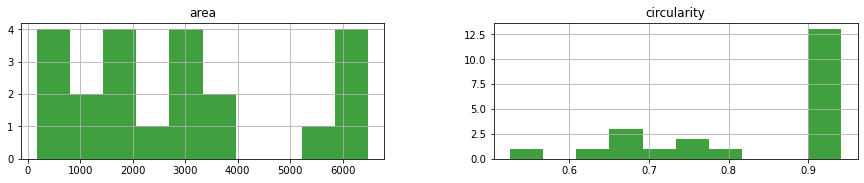

In [50]:
myM.histMeasurements()